# 📊 GDP & Economic Analysis
This notebook explores India's GDP trends and economic indicators.

## 📌 Introduction
We analyze GDP data to understand long-term economic trends, growth rates, and key relationships among macroeconomic indicators.

## 🗂 Data Description
- **GDP (Nominal)**: Total economic output without adjusting for inflation.
- **GDP (Real)**: Adjusted for inflation.
- **GDP Growth (annual %)**: Year-over-year growth.
- **Agriculture, Industry, Services Contribution**: Percent contributions to GDP.
- **Other macro indicators**: Poverty, Unemployment, Inflation etc.

## 🧹 Data Cleaning
We handle missing values, strip extra spaces in column names, and rename long columns for simplicity.

## Problem description
* The primary goal of our is to analyze India’s GDP and economic
growth trends in detail, examining the composition of GDP,
sectoral contributions, and the influence of factors such as
inflation, foreign investment, government policy, and
population growth.
* Explore how exports, imports, and FDI inflows contribute to GDP
growth and affect India’s trade balance and currency reserves.
* Analyze the impact of fiscal deficit, public debt, and repo rate
changes on economic growth, investment, and inflation.
* Study population growth, poverty rate, and household consumption patterns to
understand their relationship with GDP growth and economic development

## importing libraries

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Import data

In [3]:

file_path = "DHV Dataset_Indian_Economy_&_GDP_Growth.xlsx"
df = pd.read_excel(file_path)

print("Data imported successfully:")
print(df.head())


Data imported successfully:
   Year  GDP (Nominal)  GDP (Real)   GDP growth (annual %)   \
0  1971          35.58        67.4                 1.642930   
1  1972          36.06        71.5                -0.553301   
2  1973          38.32        85.5                 3.295521   
3  1974          38.47        99.5                 1.185336   
4  1975          41.57        98.5                 9.149912   

   Agriculture Contribution (% of GDP)  Industry Contribution (% of GDP)  \
0                                34.58                             26.47   
1                                34.44                             26.48   
2                                34.06                             25.77   
3                                34.23                             25.85   
4                                35.26                             25.19   

   Services Contribution (% of GDP)  Inflation CPI  Unemployment Rate (%)  \
0                             43.32       5.324841         

In [4]:
df.head()

,Year,GDP (Nominal),GDP (Real),GDP growth (annual %),Agriculture Contribution (% of GDP),Industry Contribution (% of GDP),Services Contribution (% of GDP),Inflation CPI,Unemployment Rate (%),Exports (% of GDP),...,Population Growth Rate (annual %),Oil rents (% of GDP),Government Revenues (% of GDP),Household Consumption Expenditure (% of GDP),Gross Fixed Capital Formation (% of GDP),Private Sector Credit (% of GDP),Poverty Rate (%),Energy Consumption per Capita (kWh),Current Account Balance (% of GDP),Tax revenue (% of GDP)
0,1971,35.58,67.4,1.642930,34.58,26.47,43.32,5.324841,5.3,3.667205,...,5.307963,0.087218,9.74,54.9,16.59,12.49,45.3,250,-0.5,9.06
1,1972,36.06,71.5,-0.553301,34.44,26.48,43.74,10.839600,5.3,4.027489,...,5.678821,0.078421,9.63,56.7,17.05,12.92,45.3,258,-0.4,9.25
2,1973,38.32,85.5,3.295521,34.06,25.77,44.11,17.829720,5.0,4.208763,...,5.705386,0.077427,9.58,58.4,15.91,13.09,44.4,269,-0.2,9.16
3,1974,38.47,99.5,1.185336,34.23,25.85,43.77,16.667520,5.2,4.831321,...,5.712841,0.426931,9.90,60.0,16.60,12.91,44.0,274,-1.0,8.43
4,1975,41.57,98.5,9.149912,35.26,25.19,43.52,-1.648680,4.9,5.647062,...,5.655836,0.534883,10.09,61.2,17.71,14.93,44.0,288,-1.4,8.66


In [3]:
df.shape #->gives shape of the dataset (rows,columns)

(53, 26)

In [4]:
df.columns

Index(['Year', 'GDP (Nominal)', 'GDP (Real)', ' GDP growth (annual %) ',
       'Agriculture Contribution (% of GDP)',
       'Industry Contribution (% of GDP)', 'Services Contribution (% of GDP)',
       'Inflation CPI', 'Unemployment Rate (%)', 'Exports (% of GDP) ',
       ' Imports  (% of GDP) ', 'FDI Inflows (USD)',
       'Fiscal Deficit (% of GDP)', 'Public Debt (% of GDP)', 'Repo Rate (%)',
       'Foreign Exchange Reserves (MILLION USD)',
       'Population Growth Rate (annual %)', 'Oil rents (% of GDP)',
       'Government Revenues (% of GDP)',
       'Household Consumption Expenditure (% of GDP)',
       'Gross Fixed Capital Formation (% of GDP)',
       'Private Sector Credit (% of GDP)', 'Poverty Rate (%)',
       'Energy Consumption per Capita (kWh)',
       'Current Account Balance (% of GDP)', 'Tax revenue (% of GDP)'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip()

# Rename long columns to short, typo-safe names
df.rename(columns={
    'GDP (Nominal)': 'GDP_Nominal',
    'GDP (Real)': 'GDP_Real',
    'GDP growth (annual %)': 'GDP_Growth',
    'Agriculture Contribution (% of GDP)': 'Agri_GDP%',
    'Industry Contribution (% of GDP)': 'Industry_GDP%',
    'Services Contribution (% of GDP)': 'Services_GDP%',
    'Inflation CPI': 'Inflation_CPI',
    'Unemployment Rate (%)': 'Unemployment_Rate',
    'Exports (% of GDP)': 'Exports_GDP%',
    'Imports  (% of GDP)': 'Imports_GDP%',
    'FDI Inflows (USD)': 'FDI_Inflows',
    'Fiscal Deficit (% of GDP)': 'Fiscal_Deficit',
    'Public Debt (% of GDP)': 'Public_Debt',
    'Repo Rate (%)': 'Repo_Rate',
    'Foreign Exchange Reserves (MILLION USD)': 'Forex_Reserves',
    'Population Growth Rate (annual %)': 'Population_Growth',
    'Oil rents (% of GDP)': 'Oil_Rents',
    'Government Revenues (% of GDP)': 'Govt_Revenue',
    'Household Consumption Expenditure (% of GDP)': 'Household_Consumption',
    'Gross Fixed Capital Formation (% of GDP)': 'Capital_Formation',
    'Private Sector Credit (% of GDP)': 'Private_Credit',
    'Poverty Rate (%)': 'Poverty_Rate',
    'Energy Consumption per Capita (kWh)': 'Energy_Consumption',
    'Current Account Balance (% of GDP)': 'Current_Account_Balance',
    'Tax revenue (% of GDP)': 'Tax_Revenue'
}, inplace=True)

print(df.columns.tolist())


['Year', 'GDP_Nominal', 'GDP_Real', 'GDP_Growth', 'Agri_GDP%', 'Industry_GDP%', 'Services_GDP%', 'Inflation_CPI', 'Unemployment_Rate', 'Exports_GDP%', 'Imports_GDP%', 'FDI_Inflows', 'Fiscal_Deficit', 'Public_Debt', 'Repo_Rate', 'Forex_Reserves', 'Population_Growth', 'Oil_Rents', 'Govt_Revenue', 'Household_Consumption', 'Capital_Formation', 'Private_Credit', 'Poverty_Rate', 'Energy_Consumption', 'Current_Account_Balance', 'Tax_Revenue']


In [6]:
df.dtypes #checking datatypes of columns

Year                         int64
GDP_Nominal                float64
GDP_Real                   float64
GDP_Growth                 float64
Agri_GDP%                  float64
Industry_GDP%              float64
Services_GDP%              float64
Inflation_CPI              float64
Unemployment_Rate          float64
Exports_GDP%               float64
Imports_GDP%               float64
FDI_Inflows                float64
Fiscal_Deficit             float64
Public_Debt                float64
Repo_Rate                  float64
Forex_Reserves               int64
Population_Growth          float64
Oil_Rents                  float64
Govt_Revenue               float64
Household_Consumption      float64
Capital_Formation          float64
Private_Credit             float64
Poverty_Rate               float64
Energy_Consumption           int64
Current_Account_Balance    float64
Tax_Revenue                float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     53 non-null     int64  
 1   GDP_Nominal              53 non-null     float64
 2   GDP_Real                 53 non-null     float64
 3   GDP_Growth               53 non-null     float64
 4   Agri_GDP%                53 non-null     float64
 5   Industry_GDP%            53 non-null     float64
 6   Services_GDP%            53 non-null     float64
 7   Inflation_CPI            53 non-null     float64
 8   Unemployment_Rate        53 non-null     float64
 9   Exports_GDP%             53 non-null     float64
 10  Imports_GDP%             53 non-null     float64
 11  FDI_Inflows              53 non-null     float64
 12  Fiscal_Deficit           53 non-null     float64
 13  Public_Debt              53 non-null     float64
 14  Repo_Rate                53 

## Data Cleaning
Find missing values and removing them

In [8]:
print("Missing values before removal:")
print(df.isnull().sum()) 
df.dropna(inplace=True)
print("Missing values after removal:")
print(df.isnull().sum())


Missing values before removal:
Year                       0
GDP_Nominal                0
GDP_Real                   0
GDP_Growth                 0
Agri_GDP%                  0
Industry_GDP%              0
Services_GDP%              0
Inflation_CPI              0
Unemployment_Rate          0
Exports_GDP%               0
Imports_GDP%               0
FDI_Inflows                0
Fiscal_Deficit             0
Public_Debt                0
Repo_Rate                  0
Forex_Reserves             0
Population_Growth          0
Oil_Rents                  2
Govt_Revenue               0
Household_Consumption      0
Capital_Formation          0
Private_Credit             0
Poverty_Rate               0
Energy_Consumption         0
Current_Account_Balance    0
Tax_Revenue                0
dtype: int64
Missing values after removal:
Year                       0
GDP_Nominal                0
GDP_Real                   0
GDP_Growth                 0
Agri_GDP%                  0
Industry_GDP%              

Identify duplicate values and removing them


In [9]:

print("Duplicate rows before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after removal:", df.duplicated().sum())


Duplicate rows before removal: 0
Duplicate rows after removal: 0


Finding Outliers using IQR method


In [6]:
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

non_outliers_mask = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

df_no_outliers = df[non_outliers_mask]

print("Data after removing outliers:")
df_no_outliers.head()

Data after removing outliers:


,Year,GDP (Nominal),GDP (Real),GDP growth (annual %),Agriculture Contribution (% of GDP),Industry Contribution (% of GDP),Services Contribution (% of GDP),Inflation CPI,Unemployment Rate (%),Exports (% of GDP),...,Population Growth Rate (annual %),Oil rents (% of GDP),Government Revenues (% of GDP),Household Consumption Expenditure (% of GDP),Gross Fixed Capital Formation (% of GDP),Private Sector Credit (% of GDP),Poverty Rate (%),Energy Consumption per Capita (kWh),Current Account Balance (% of GDP),Tax revenue (% of GDP)
1,1972,36.06,71.5,-0.553301,34.44,26.48,43.74,10.839600,5.3,4.027489,...,5.678821,0.078421,9.63,56.7,17.05,12.92,45.3,258,-0.4,9.25
3,1974,38.47,99.5,1.185336,34.23,25.85,43.77,16.667520,5.2,4.831321,...,5.712841,0.426931,9.90,60.0,16.60,12.91,44.0,274,-1.0,8.43
4,1975,41.57,98.5,9.149912,35.26,25.19,43.52,-1.648680,4.9,5.647062,...,5.655836,0.534883,10.09,61.2,17.71,14.93,44.0,288,-1.4,8.66
5,1976,42.86,102.7,1.663104,36.35,24.55,43.43,5.981859,5.0,6.686513,...,5.582935,0.613269,10.23,62.4,18.49,17.89,43.0,303,-1.0,9.25
6,1977,44.86,121.5,7.254765,35.91,24.40,43.78,5.637229,5.0,6.383172,...,5.567425,0.677971,10.48,63.7,18.79,18.04,63.1,314,-0.9,9.43


Data Transformation using Z score normalization

In [7]:
numeric_df = df.select_dtypes(include=['number'])

mean = numeric_df.mean()
std_dev = numeric_df.std()

df_zscore_normalized = (numeric_df - mean) / std_dev

df_normalized = df.copy()
df_normalized[numeric_df.columns] = df_zscore_normalized

print("Data after manual Z-score Normalization:")
df_normalized.head()

Data after manual Z-score Normalization:


,Year,GDP (Nominal),GDP (Real),GDP growth (annual %),Agriculture Contribution (% of GDP),Industry Contribution (% of GDP),Services Contribution (% of GDP),Inflation CPI,Unemployment Rate (%),Exports (% of GDP),...,Population Growth Rate (annual %),Oil rents (% of GDP),Government Revenues (% of GDP),Household Consumption Expenditure (% of GDP),Gross Fixed Capital Formation (% of GDP),Private Sector Credit (% of GDP),Poverty Rate (%),Energy Consumption per Capita (kWh),Current Account Balance (% of GDP),Tax revenue (% of GDP)
0,-1.683562,-0.670402,-0.858790,-1.181467,1.314532,1.063782,-1.142646,-0.506674,-0.257122,-1.307281,...,0.968762,-1.695800,-1.343365,-3.069968,-1.699225,-1.453522,0.739408,-1.417986,0.740531,-0.641451
1,-1.618810,-0.669949,-0.854744,-1.871443,1.295241,1.077206,-1.051984,0.944418,-0.257122,-1.256559,...,1.313009,-1.713990,-1.531857,-2.496041,-1.614797,-1.422141,0.739408,-1.390900,0.838652,-0.425778
2,-1.554057,-0.667820,-0.840927,-0.662284,1.242881,0.124108,-0.972115,2.783721,-0.481751,-1.231039,...,1.337668,-1.716045,-1.617534,-1.953999,-1.824032,-1.409734,0.674323,-1.353657,1.034892,-0.527939
3,-1.489305,-0.667679,-0.827110,-1.325227,1.266306,0.231499,-1.045508,2.477912,-0.331999,-1.143393,...,1.344588,-0.993384,-1.069196,-1.443841,-1.697390,-1.422871,0.645396,-1.336728,0.249929,-1.356578
4,-1.424553,-0.664758,-0.828097,1.176951,1.408228,-0.654479,-1.099474,-2.341609,-0.556627,-1.028550,...,1.291673,-0.770174,-0.743620,-1.061223,-1.493662,-1.275453,0.645396,-1.289328,-0.142552,-1.095500


## Trends in Indian Economy and GDP Growth

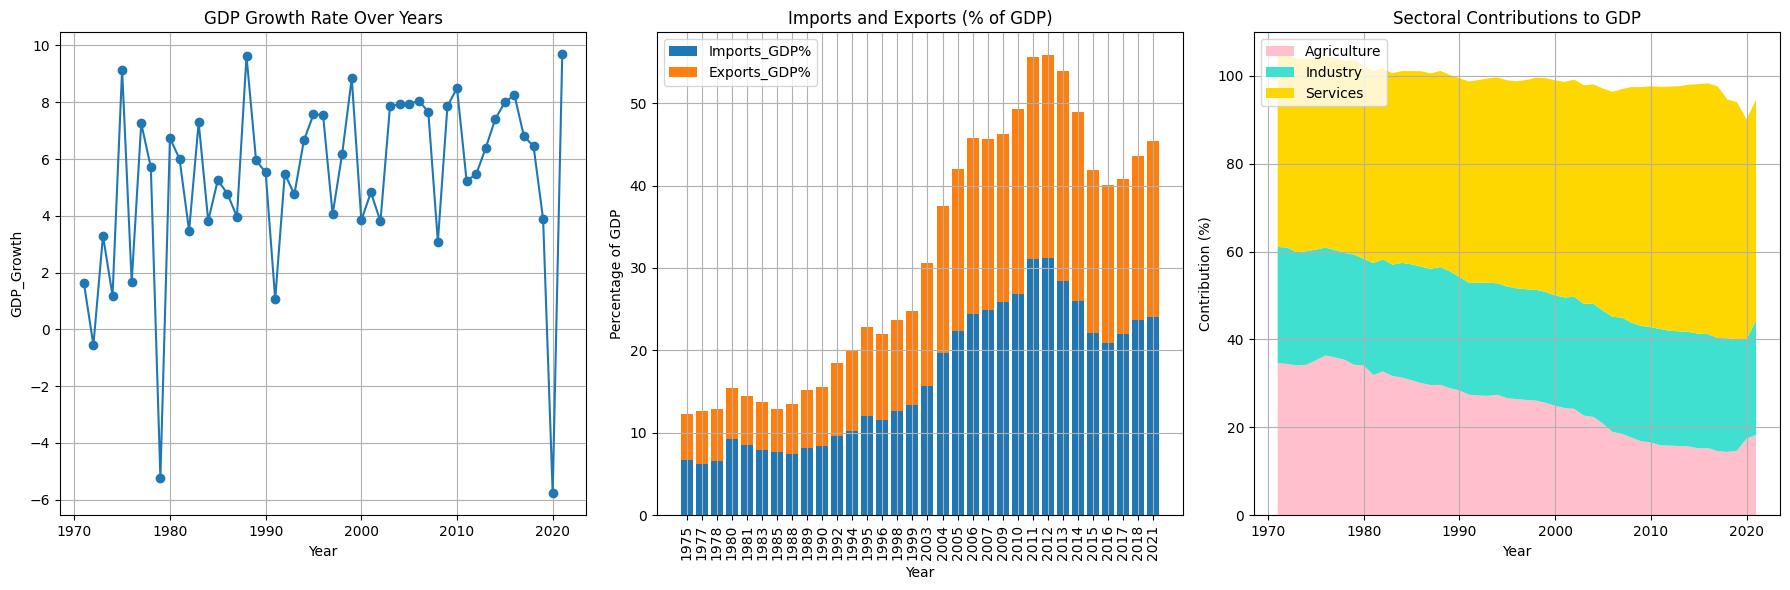

In [12]:
# Filter data
df_filtered = df[df['GDP_Growth'] > 5]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: GDP Growth
axs[0].plot(df['Year'], df['GDP_Growth'], marker='o')
axs[0].set(title="GDP Growth Rate Over Years", xlabel="Year", ylabel="GDP_Growth")
axs[0].grid(True)

# Plot 2: Imports and Exports
x = np.arange(len(df_filtered))
axs[1].bar(x, df_filtered['Imports_GDP%'], label='Imports_GDP%')
axs[1].bar(x, df_filtered['Exports_GDP%'], bottom=df_filtered['Imports_GDP%'], label='Exports_GDP%')
axs[1].set_xticks(x)
axs[1].set_xticklabels(df_filtered['Year'].astype(int), rotation=90)
axs[1].set(title="Imports and Exports (% of GDP)", xlabel="Year", ylabel="Percentage of GDP")
axs[1].legend()
axs[1].grid(True)

# Plot 3: Sectoral Contributions
axs[2].stackplot(
    df['Year'],
    df['Agri_GDP%'],
    df['Industry_GDP%'],
    df['Services_GDP%'],
    labels=['Agriculture', 'Industry', 'Services'],
    colors=['pink', 'turquoise', 'gold']
)
axs[2].set(title="Sectoral Contributions to GDP", xlabel="Year", ylabel="Contribution (%)")
axs[2].legend(loc='upper left')
axs[2].grid(True)

plt.tight_layout()
plt.show()


- DP_Growth v/s Year->GDP shows high volatility during earlier years becomes stable after 1991 sharp decline GDP growth in 2020 due to COVID
- Percentage of GDP v/s Year->increasing trend of imports and exports is observed peaked between 2010-2012 after that decline in imports and exports is observed
- Contribution(%) v/s Year->Agriculture contribution shows steady decline in contribution to GDP ,industry sector maintains a stable contribution in GDP ,service sector shows significant increase in contribution to GDP 

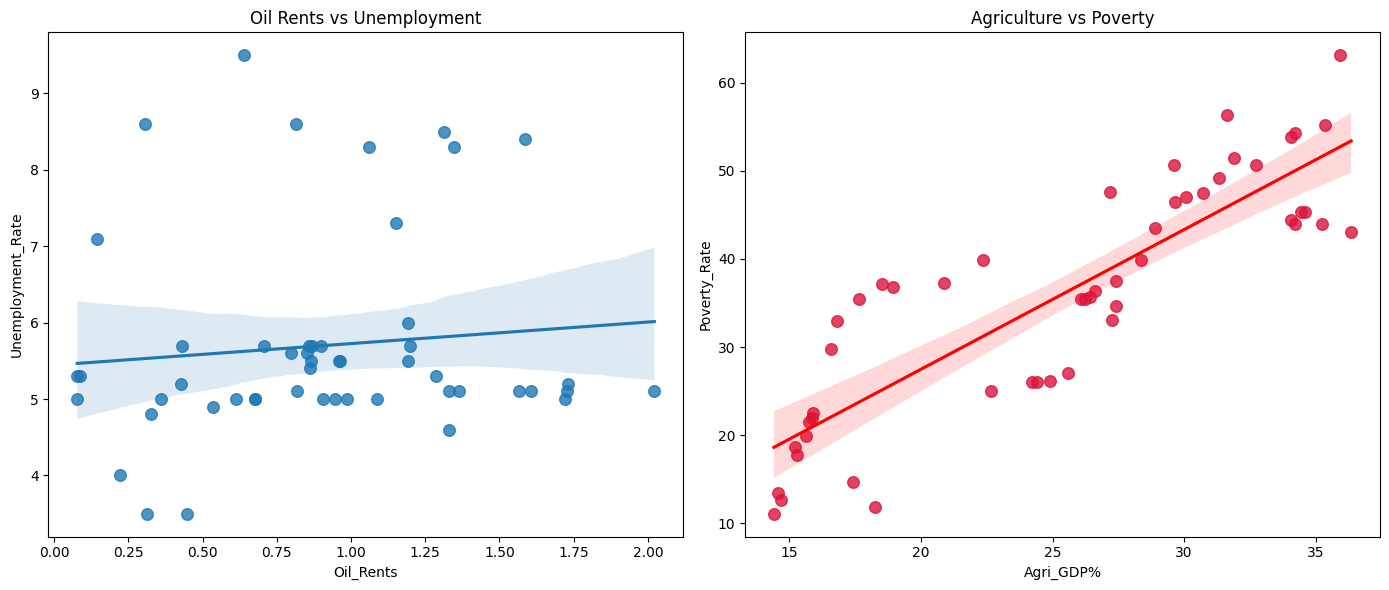

In [13]:
# Prepare data
cols = ['Oil_Rents', 'Unemployment_Rate',
        'Agri_GDP%', 'Poverty_Rate']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=cols, inplace=True)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1
sns.regplot(data=df, x=cols[0], y=cols[1], ax=axes[0], scatter_kws={'s': 70})
axes[0].set_title("Oil Rents vs Unemployment")

# Plot 2
sns.regplot(data=df, x=cols[2], y=cols[3], ax=axes[1], scatter_kws={'s': 70, 'color': 'crimson'}, line_kws={'color': 'red'})
axes[1].set_title("Agriculture vs Poverty")

plt.tight_layout()
plt.show()


- oil rents and unemployment rate have weak correlation between them,oil rents have no impact on unemployemt rate
- Agri_GDP% and Poverty Rate shows strong correlation between them,higher agri contribution to GDP aligns with higer poverty rate

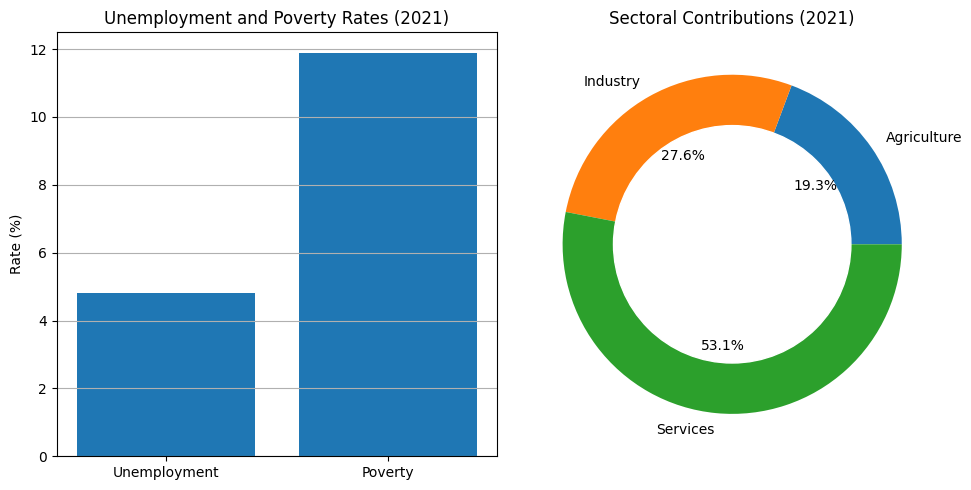

In [14]:
# Filter data for a single year
df_year = df[df['Year'] == 2021].iloc[0]

fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Bar plot: Unemployment and Poverty Rates
axs[0].bar(['Unemployment', 'Poverty'], [df_year['Unemployment_Rate'], df_year['Poverty_Rate']])
axs[0].set(title="Unemployment and Poverty Rates (2021)", ylabel="Rate (%)")
axs[0].grid(axis='y')

# Pie chart: Sectoral Contribution
values = df_year[['Agri_GDP%', 'Industry_GDP%', 'Services_GDP%']]
labels = ['Agriculture', 'Industry', 'Services']
axs[1].pie(values, labels=labels, autopct='%1.1f%%')
axs[1].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axs[1].set_title("Sectoral Contributions (2021)")

plt.tight_layout()
plt.show()


- Unemployment rate is much lower than poverty rate signifying earnings are not sufficient to come out of poverty line
- Service sector dominates towards contribution which is 53.1% and Agriculture sector contribution is least 19% showing service-driven economy

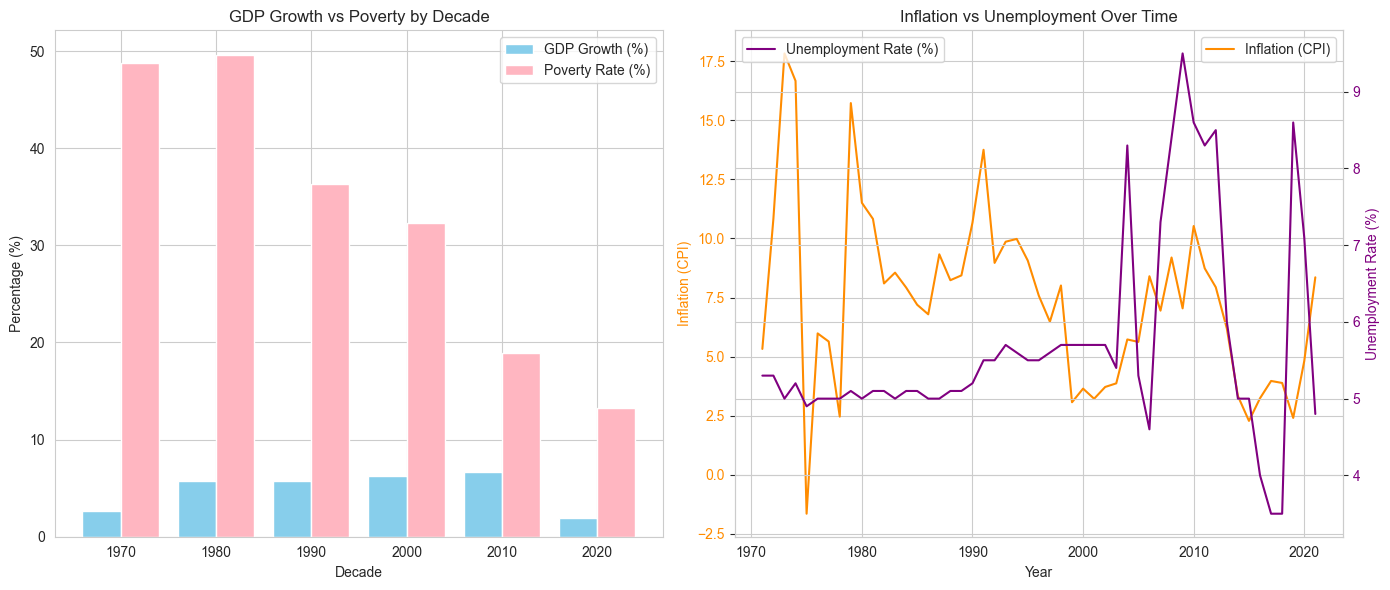

In [15]:
df['Decade'] = (df['Year'] // 10) * 10 #creating new column decade by flooring it to nearest decade
df_decade = df.groupby('Decade')[['GDP_Growth', 'Poverty_Rate']].mean().reset_index() #grouping by decade calculating mean GDP Growth and poverty rate for each decade
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1) # 1st row 2 columns 1 position
bar_width = 4
#bar for gdp groth
plt.bar(df_decade['Decade'] - bar_width/2, df_decade['GDP_Growth'], #shifting left for side by side bars
        width=bar_width, color='skyblue', label='GDP Growth (%)')
#bar for poverty rate
plt.bar(df_decade['Decade'] + bar_width/2, df_decade['Poverty_Rate'], #shifting right for side by side bars
        width=bar_width, color='lightpink', label='Poverty Rate (%)')
plt.xlabel('Decade')
plt.ylabel('Percentage (%)')
plt.title('GDP Growth vs Poverty by Decade')
plt.legend()
plt.subplot(1,2,2) #1st row 2 columns 2 position
#Inflation CPI
ax1 = sns.lineplot(x='Year', y='Inflation_CPI', data=df, color='darkorange', label='Inflation (CPI)')
ax1.set_ylabel('Inflation (CPI)', color='darkorange')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax2 = ax1.twinx()
#Unemployment rate
sns.lineplot(x='Year', y='Unemployment_Rate', data=df, color='purple', label='Unemployment Rate (%)', ax=ax2)
ax2.set_ylabel('Unemployment Rate (%)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
plt.title('Inflation vs Unemployment Over Time')
ax1.set_xlabel('Year')
plt.tight_layout()
plt.show()


Q1.Why is GDP important for an economy?


GDP is crucial as it measures the total economic output, indicating the health and growth of the economy. It helps governments and investors understand trends and make policies.

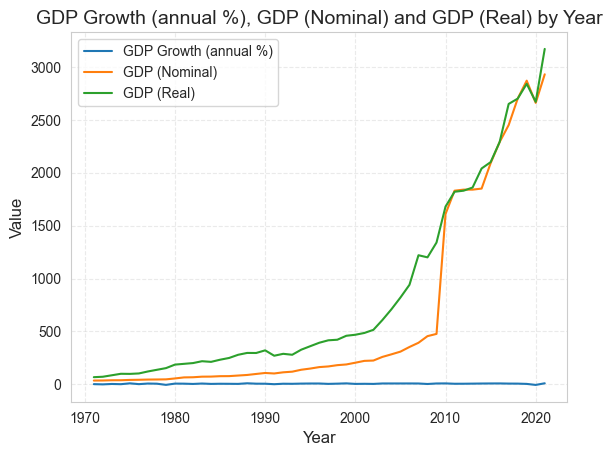

In [16]:
sns.lineplot(data=df, x='Year', y='GDP_Growth', label='GDP Growth (annual %)')
sns.lineplot(data=df, x='Year', y='GDP_Nominal', label='GDP (Nominal)')
sns.lineplot(data=df, x='Year', y='GDP_Real', label='GDP (Real)')
plt.title("GDP Growth (annual %), GDP (Nominal) and GDP (Real) by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.show()


- Real gdp consistently grows,whereas nomial gdp exponentially grows after 2000 while Gdp growth annual remained relatively stable but showed a dip during 2020 due to COVID 

Q2. What are the main components of India's GDP

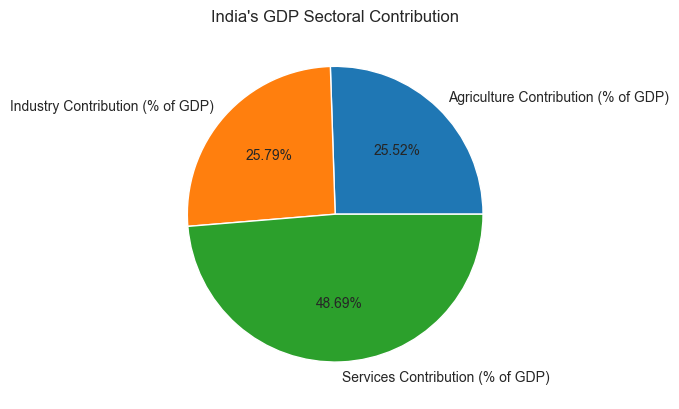

In [17]:
labels = ['Agriculture Contribution (% of GDP)', 'Industry Contribution (% of GDP)', 'Services Contribution (% of GDP)']

sizes = [df['Agri_GDP%'].sum(), df['Industry_GDP%'].sum(), df['Services_GDP%'].sum()]

plt.pie(sizes,labels=labels,autopct='%2.2f%%') #autopct displays percentages inside slices with two decimal places.

plt.title("India's GDP Sectoral Contribution")

plt.show()

- Service sector dominates its contribution to GDP and Agriculture contributes least towards GDP

Q3. How does inflation affect GDP and economic growth in India


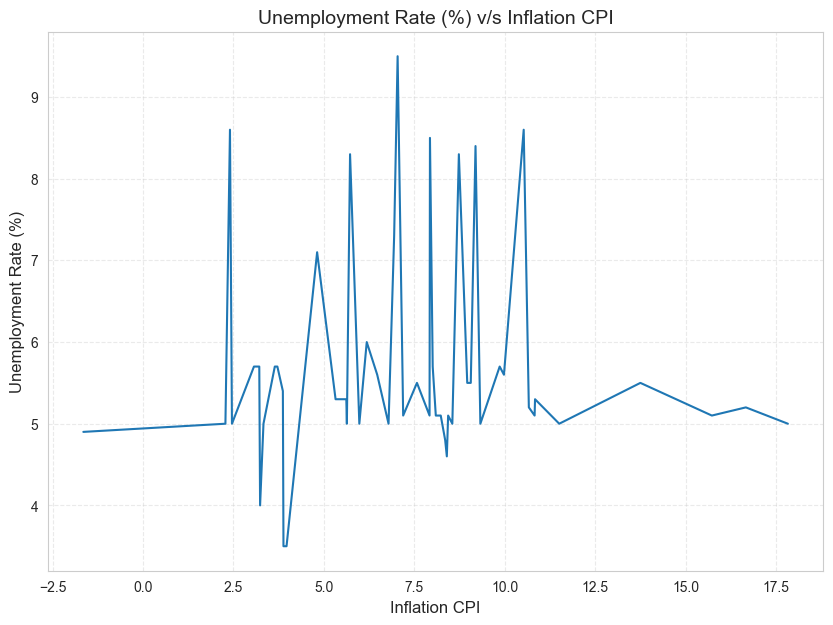

In [18]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=df, x='Inflation_CPI', y='Unemployment_Rate')
plt.title("Unemployment Rate (%) v/s Inflation CPI", fontsize=14)
plt.xlabel("Inflation CPI", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

- no clear trend is observed in the graph

What are the main challenges facing India’s economy?

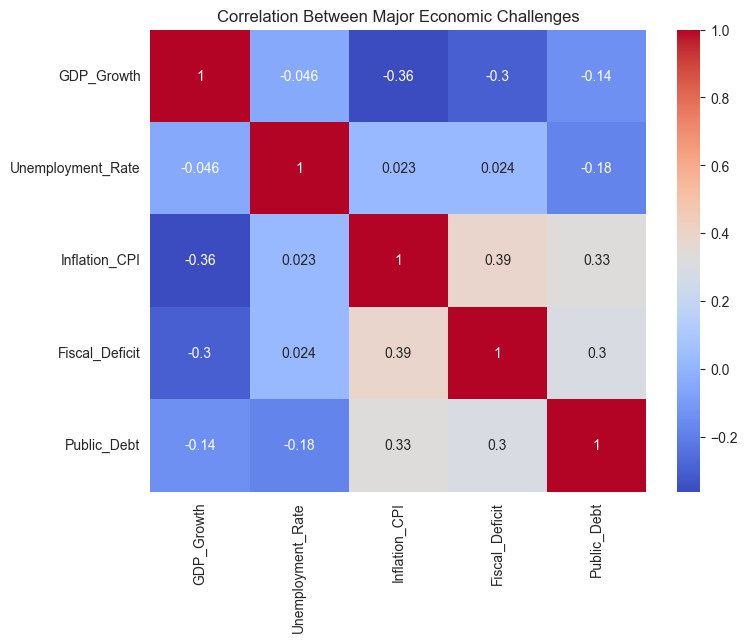

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['GDP_Growth', 'Unemployment_Rate', 'Inflation_CPI', 'Fiscal_Deficit', 'Public_Debt']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Major Economic Challenges")
plt.show()


- Higher inflation, fiscal deficits, and public debt are moderately interlinked and tend to be associated with lower GDP growth, while unemployment shows weak or negligible direct correlations with these factors.

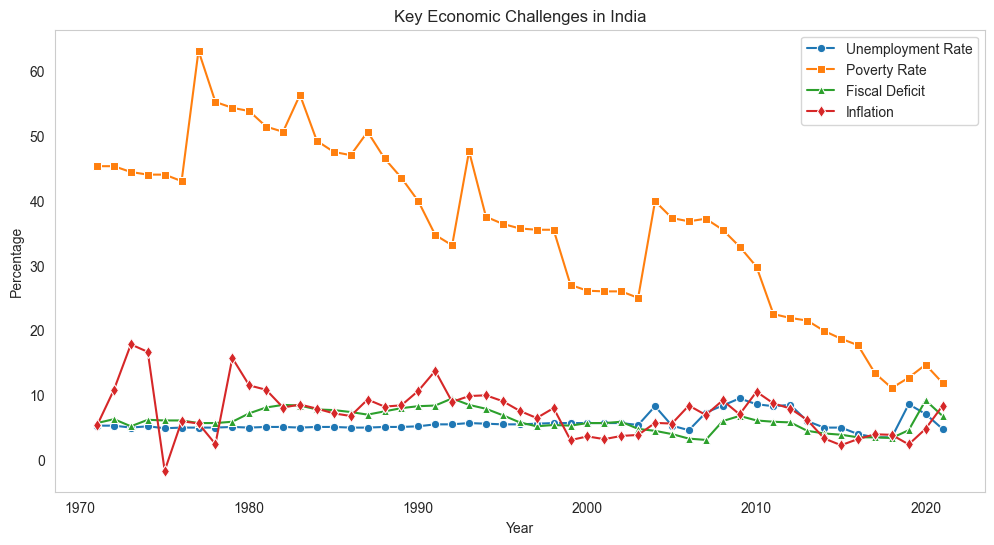

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Unemployment_Rate', label='Unemployment Rate', marker='o')
sns.lineplot(data=df, x='Year', y='Poverty_Rate', label='Poverty Rate', marker='s')
sns.lineplot(data=df, x='Year', y='Fiscal_Deficit', label='Fiscal Deficit', marker='^')
sns.lineplot(data=df, x='Year', y='Inflation_CPI', label='Inflation', marker='d')

plt.title('Key Economic Challenges in India')
plt.ylabel('Percentage')
plt.grid()
plt.legend()
plt.show()


- Poverty has rapidly declined, while unemployment, fiscal deficit, and inflation showed fluctuations.

Q5.What role does foreign investment play in India's economic
growth?

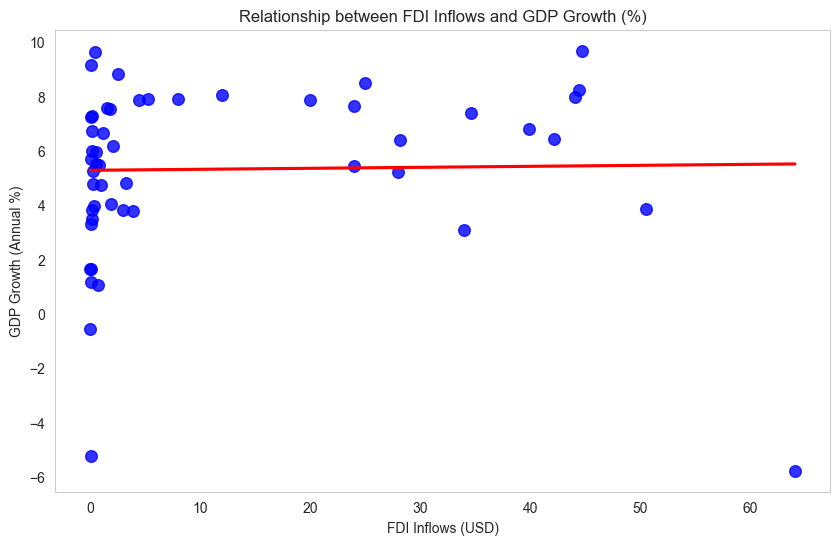

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='FDI_Inflows',
    y='GDP_Growth',
    ci=None,
    scatter_kws={"s": 70, "color": "blue"},
    line_kws={"color": "red"}
)

plt.title('Relationship between FDI Inflows and GDP Growth (%)')
plt.xlabel('FDI Inflows (USD)')
plt.ylabel('GDP Growth (Annual %)')
plt.grid()
plt.show()


- there is weak correlation between GDP growth and FDI inflow


Q6. What is the contribution of exports and imports to India's GDP?

Text(0, 0.5, '% of GDP')

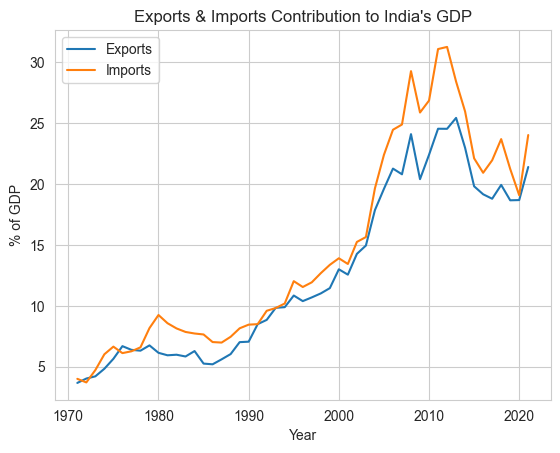

In [22]:
sns.lineplot(data=df,x='Year',y='Exports_GDP%',label='Exports')
sns.lineplot(data=df,x='Year',y='Imports_GDP%',label='Imports')
plt.title("Exports & Imports Contribution to India's GDP")
plt.ylabel('% of GDP')

- Exports and imports have grown sharply as a share of India’s GDP since 1970, with imports always higher, especially rising after 1990, though showing some drops after 2014.

 Q7 Visualize Foreign Trade and FDI trends

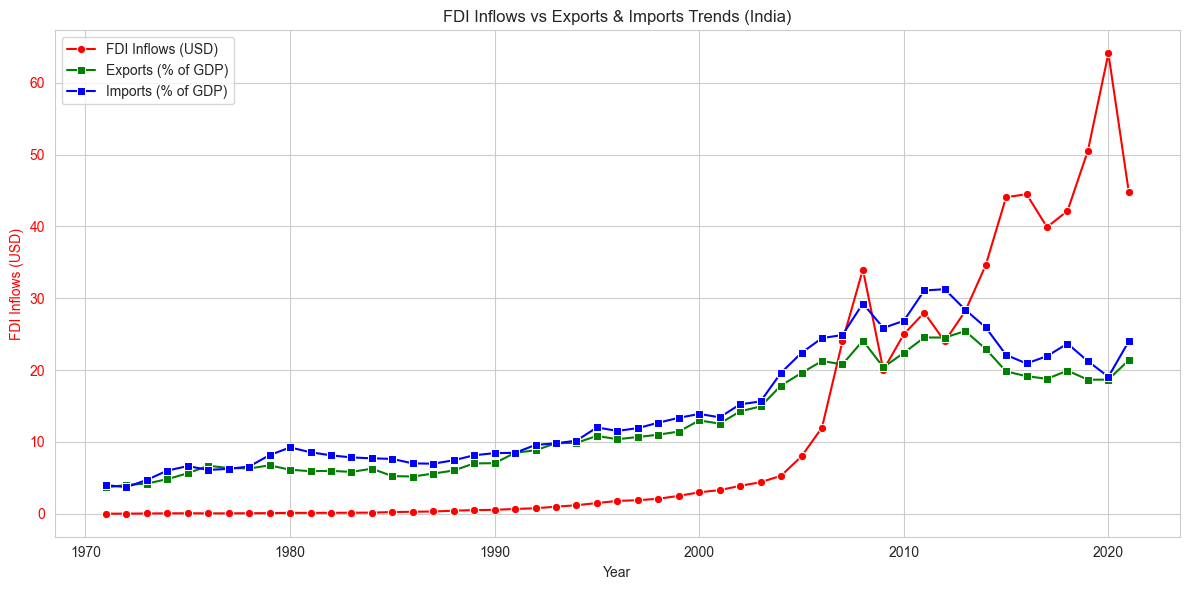

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='FDI_Inflows',  color='red', label='FDI Inflows (USD)', marker='o')
ax1.set_ylabel('FDI Inflows (USD)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
sns.lineplot(data=df, x='Year', y='Exports_GDP%',color='green', label='Exports (% of GDP)', marker='s')
sns.lineplot(data=df, x='Year', y='Imports_GDP%', color='blue', label='Imports (% of GDP)', marker='s')
plt.title("FDI Inflows vs Exports & Imports Trends (India)")
fig.tight_layout()
plt.show()


- FDI inflow incraesed after 1990,both exports and imports rose rapidly till 2010, with imports remained higher than exports cauisng trade deficit.

Q8. What was the sectoral contribution in GDP during pandemic?

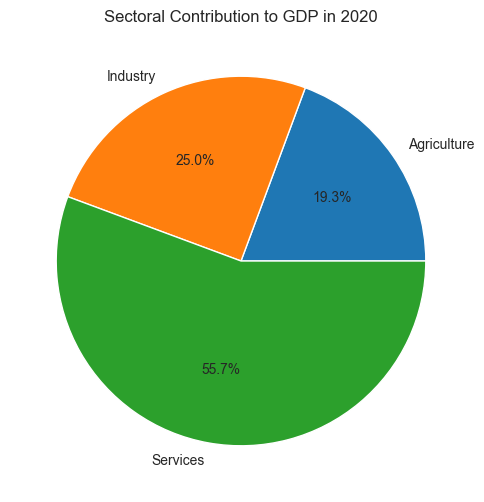

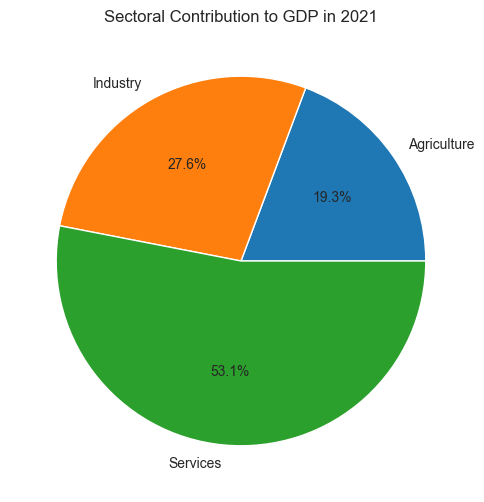

In [24]:
# Filter data for pandemic years
pandemic_data = df[df['Year'].isin([2020, 2021])]

# Pie chart for each year
for index, row in pandemic_data.iterrows():
    labels = ['Agriculture', 'Industry', 'Services']
    sizes = [row['Agri_GDP%'], row['Industry_GDP%'], row['Services_GDP%']]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f"Sectoral Contribution to GDP in {int(row['Year'])}")
    plt.show()


- Agri Gdp contribution remains the same in both yrs whereas in industry Gdp contribution decreases by 2% in 2021 while service sector contribution increased by 2% in 2021

Q9. How govt. is responsible for Indian Economy changes?

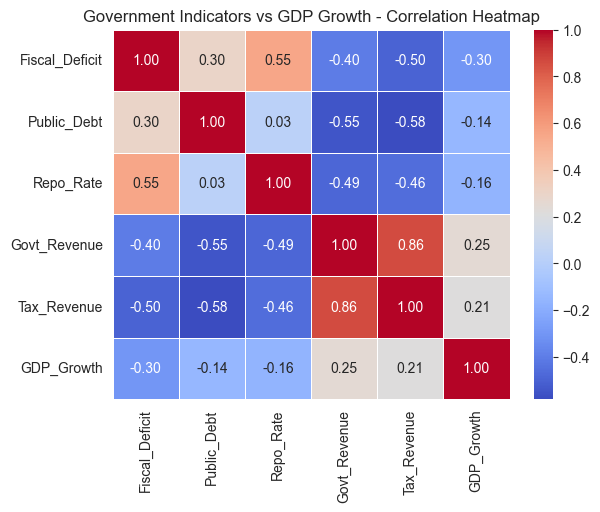

In [25]:
govt_data = df[['Fiscal_Deficit', 'Public_Debt', 'Repo_Rate', 'Govt_Revenue', 'Tax_Revenue', 'GDP_Growth']]
corr = govt_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Government Indicators vs GDP Growth - Correlation Heatmap")
plt.show()

- Repo Rate & Fiscal Deficit (0.55): +ve correlation indicates fiscal deficits causes higher interest rates.
- Fiscal Deficit vs Tax Revenue(-0.50): as Fiscal Deficit increases, Tax Revenue decrease.
- Public Debt vs Tax Revenue(-0.58):strong -ve correlation, causes lower tax revenue.
- Govt Revenue vs Tax Revenue(0.86):strong +ve correlation higher govt revenue causes higher tax revenue
- Tax Revenue vs Public Debt(0.21):Weak +ve correlation,higher tax revenue slightly supports GDP growth.

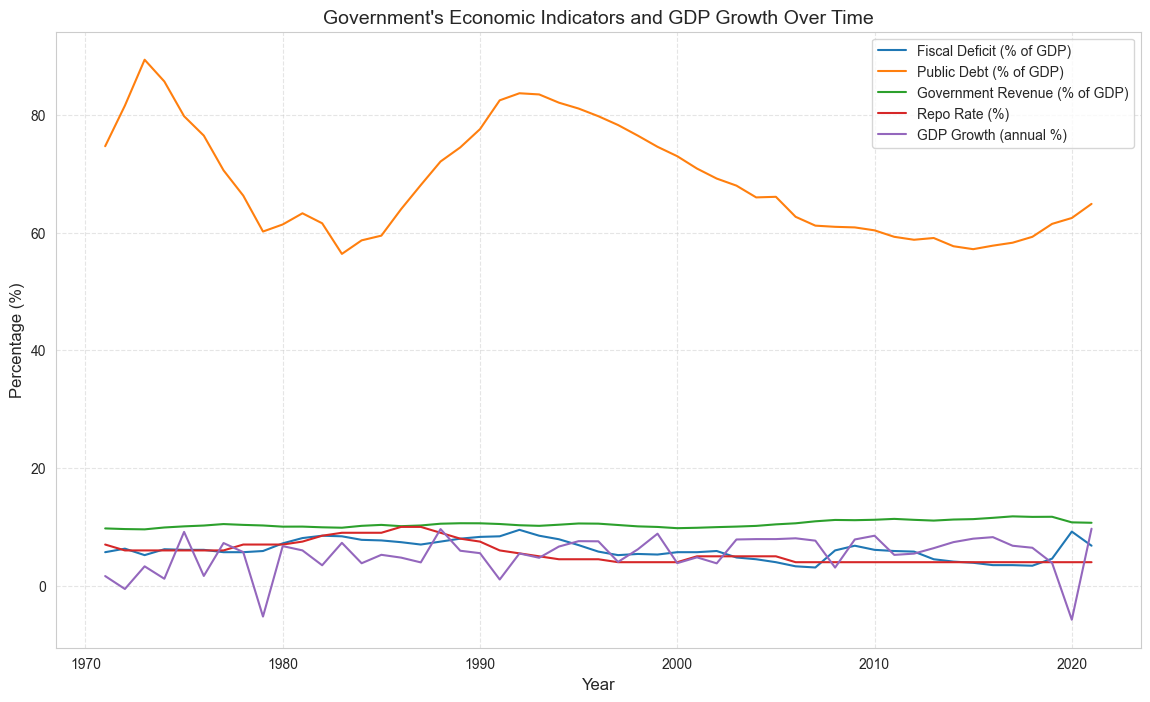

In [26]:
govt_indicators = df[['Year', 'Fiscal_Deficit', 'Public_Debt', 'Govt_Revenue', 'Repo_Rate', 'GDP_Growth']]
plt.figure(figsize=(14, 8))
sns.lineplot(data=govt_indicators, x='Year', y='Fiscal_Deficit', label='Fiscal Deficit (% of GDP)')
sns.lineplot(data=govt_indicators, x='Year', y='Public_Debt', label='Public Debt (% of GDP)')
sns.lineplot(data=govt_indicators, x='Year', y='Govt_Revenue', label='Government Revenue (% of GDP)')
sns.lineplot(data=govt_indicators, x='Year', y='Repo_Rate', label='Repo Rate (%)')
sns.lineplot(data=govt_indicators, x='Year', y='GDP_Growth', label='GDP Growth (annual %)')

plt.title("Government's Economic Indicators and GDP Growth Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


The graph (1970-2020) shows Public Debt peaked in the early 90s, then dipped and rose again. Government Revenue stayed stable. Fiscal Deficit, Repo Rate, and GDP Growth all showed significant volatility.

Q10. how Inflation changing with time?

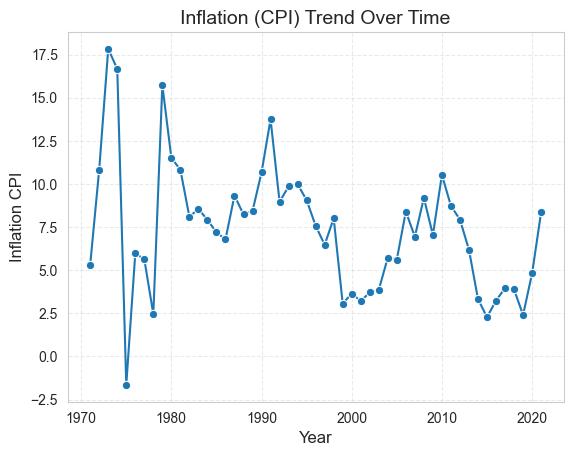

In [27]:
sns.lineplot(data=df, x='Year', y='Inflation_CPI', marker='o')
plt.title("Inflation (CPI) Trend Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Inflation CPI", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

- **1970s:** Extremely volatile inflation, peaking above 17% and falling below 0% at times.
- **1980s to early 1990s:** Inflation fluctuated between 7% to 15%, showing recurring spikes.
- **Late 1990s to early 2000s:** Noticeable decline, inflation mostly below 7%.
- **2010 to 2015:** Another upward phase with inflation reaching 10%+ at times.
- **Post-2015:** Gradual decline, inflation stabilizing below 5% with a recent spike around 2020.


Q11. How Does Tax collection affect India’s GDP?

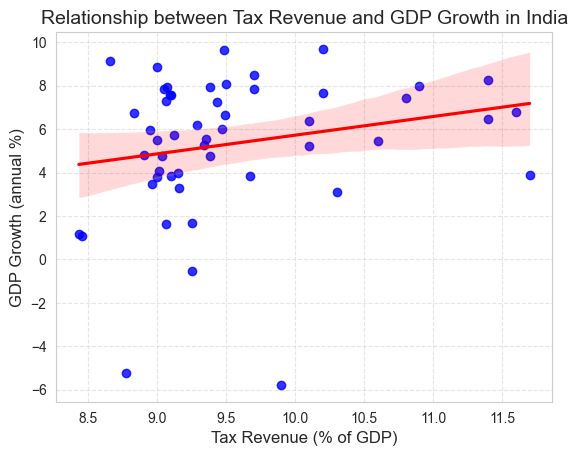

In [28]:
sns.regplot(data=df, x='Tax_Revenue', y='GDP_Growth', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Relationship between Tax Revenue and GDP Growth in India", fontsize=14)
plt.xlabel("Tax Revenue (% of GDP)", fontsize=12)
plt.ylabel("GDP Growth (annual %)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


- A weak positive correlation is observed between Tax Revenue (% of GDP) and GDP Growth (%).
- As tax revenue increases, GDP growth tends to improve slightly.
- The trend line shows an upward slope, but significant data scatter indicates other factors also influence GDP growth.



Q12. Show effect of Agriculture , Industry, and Services on India’s GDP with time? 

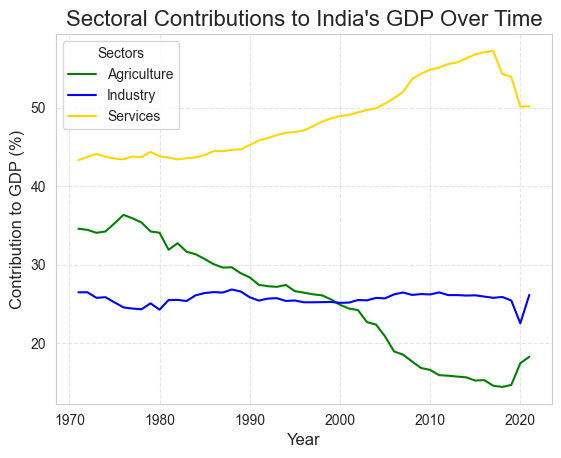

In [29]:
# Line plot for Agriculture's contribution
sns.lineplot(data=df, x='Year', y='Agri_GDP%', label='Agriculture', color='green')

# Line plot for Industry's contribution
sns.lineplot(data=df, x='Year', y='Industry_GDP%', label='Industry', color='blue')

# Line plot for Services' contribution
sns.lineplot(data=df, x='Year', y='Services_GDP%', label='Services', color='gold')
plt.title("Sectoral Contributions to India's GDP Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Contribution to GDP (%)", fontsize=12)
plt.legend(title="Sectors")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


- Service sector dominates its contribution inGDP,While contribution of industry sector remains steady while contribution of agriculture sector has declined over the yrs

Q13. How does Population affect unemployment rate ?

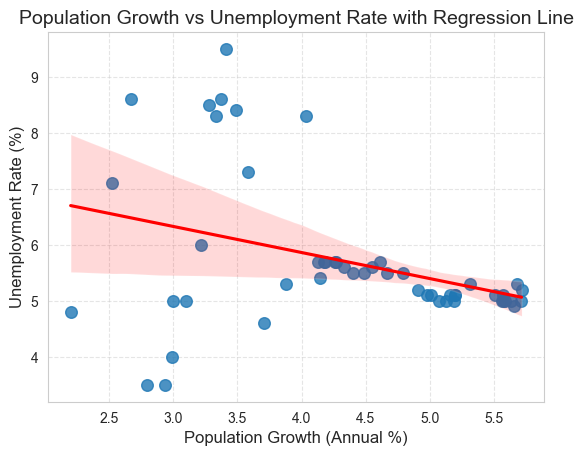

In [30]:
sns.regplot(data=df, x='Population_Growth', y='Unemployment_Rate', scatter_kws={'s': 70}, line_kws={'color': 'red'})
plt.title("Population Growth vs Unemployment Rate with Regression Line", fontsize=14)
plt.xlabel("Population Growth (Annual %)", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


- there is inverse relationship between unemployment rate and population growth (Annual %).higher population growth tend to have slightly lower unemployment rates, possibly due to a growing labor market or expanding economic activities.


Q14. How does Import and Consumption changes with time in India?

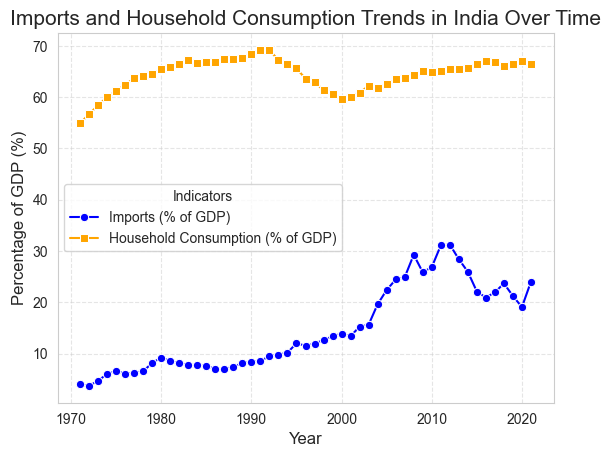

In [31]:
sns.lineplot(data=df, x='Year', y='Imports_GDP%', label='Imports (% of GDP)', color='blue', marker='o')
# Line for Household Consumption as % of GDP
sns.lineplot(data=df, x='Year', y='Household_Consumption', label='Household Consumption (% of GDP)', color='orange', marker='s')
plt.title("Imports and Household Consumption Trends in India Over Time", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of GDP (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Indicators")
plt.show()


Imports in India rose from ~5% of GDP in 1970 to ~30% by 2010, reflecting increased trade.  
Household consumption stayed high, around 60-70% of GDP, showing India’s economy remains consumption-driven.

Q15 How did India's GDP Growth change before and after the COVID-19 pandemic?

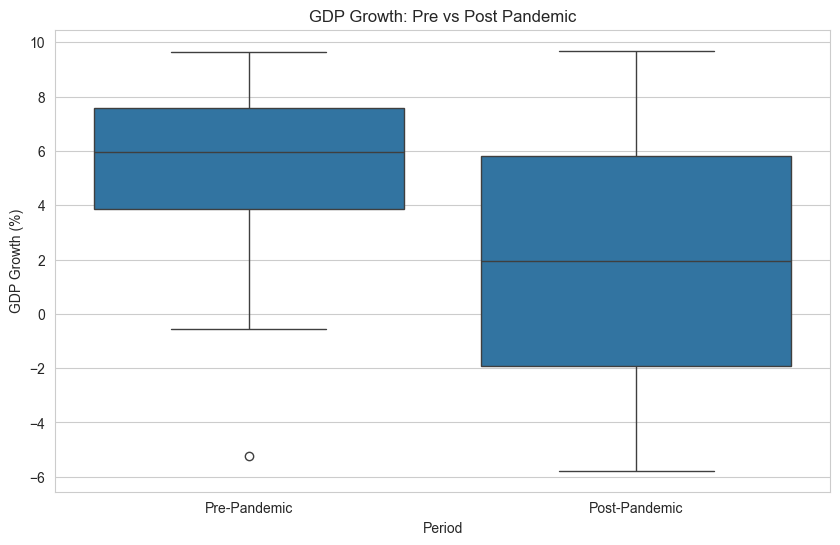

In [32]:
df['Period'] = df['Year'].apply(lambda x: 'Pre-Pandemic' if x < 2020 else 'Post-Pandemic')
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Period', y='GDP_Growth')
plt.title('GDP Growth: Pre vs Post Pandemic')
plt.ylabel('GDP Growth (%)')
plt.show()


- **Pre-Pandemic:** Median GDP growth ~6%, stable with most values between 4–8%.
- **Post-Pandemic:** Median dropped to ~2%, with much wider spread from -6% to +9%, showing higher volatility.
- **Insight:** The pandemic led to slower and more unpredictable GDP growth.

Q16 Impact of Forex Reserves on Economic Stability

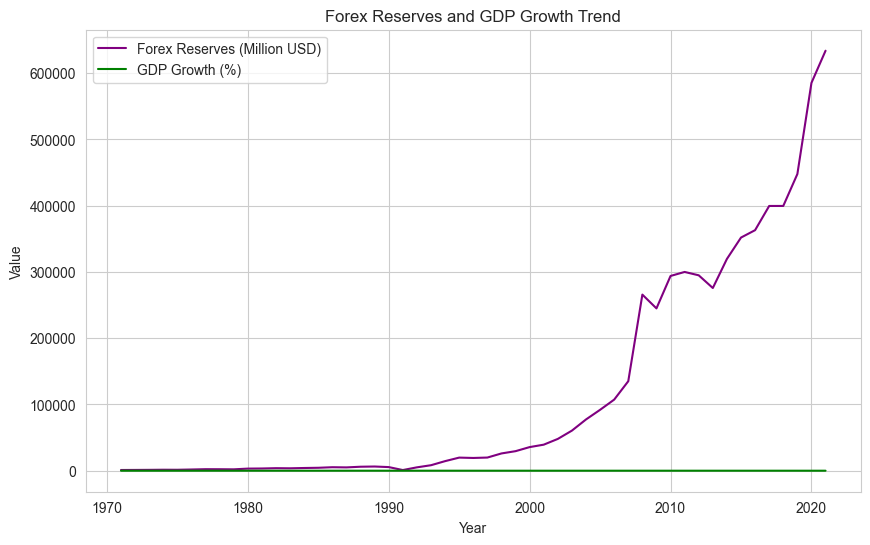

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Forex_Reserves', color='purple', label='Forex Reserves (Million USD)')
sns.lineplot(data=df, x='Year', y='GDP_Growth', color='green', label='GDP Growth (%)')
plt.title('Forex Reserves and GDP Growth Trend')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

- Forex reserves grew sharply after 2000, to  600,000 million USD by 2020.  
- GDP growth looks flat on this scale, indicating much smaller numeric values compared to reserves.


Q17 How has the Fiscal Deficit trend impacted India's Public Debt over time?

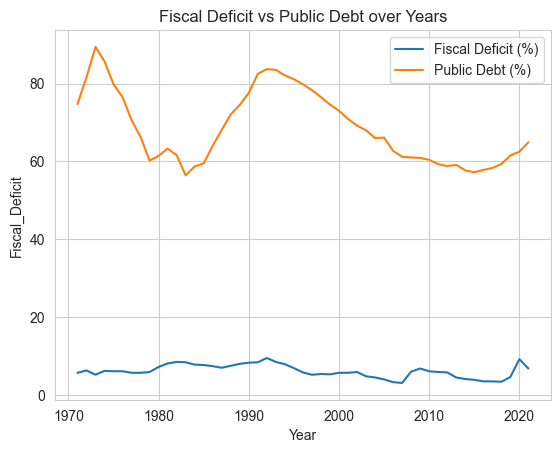

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x='Year', y='Fiscal_Deficit', label='Fiscal Deficit (%)')
sns.lineplot(data=df, x='Year', y='Public_Debt', label='Public Debt (%)')
plt.title("Fiscal Deficit vs Public Debt over Years")
plt.legend()
plt.show()


- **Fiscal Deficit** stayed mostly stable (5-10%) with a spike around 2020 (likely due to pandemic).
- **Public Debt** peaked near 90% in the 1970s, declined to ~60% by early 2000s, but started rising again post-2020.
- Both indicators show an upward trend after 2020.



Q18 Is there any visible correlation between Repo Rate changes and Inflation trends?

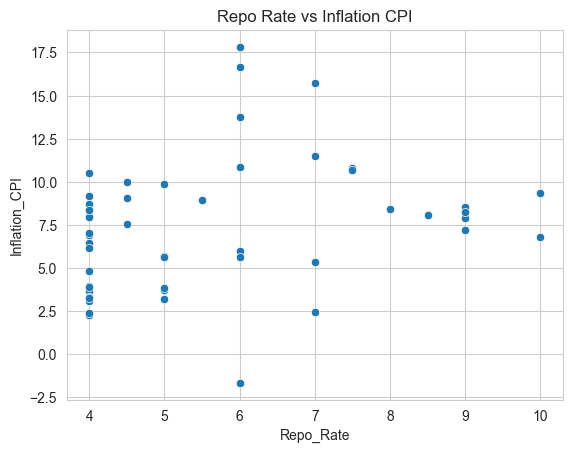

               Repo_Rate  Inflation_CPI
Repo_Rate       1.000000       0.270843
Inflation_CPI   0.270843       1.000000


In [35]:
sns.scatterplot(data=df, x='Repo_Rate', y='Inflation_CPI')
plt.title("Repo Rate vs Inflation CPI")
plt.show()

print(df[['Repo_Rate', 'Inflation_CPI']].corr())

- Weak positive correlation between Repo Rate and Inflation CPI (correlation ≈ 0.27).
- Significant scatter indicates other factors also influence inflation, not just Repo Rate.
- No clear linear pattern; relationship is weak and scattered.


Q19. How does Energy Consumption per Capita relate to GDP Growth?

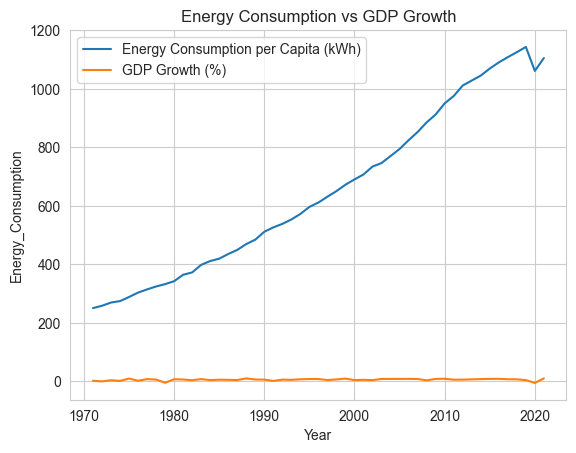

In [36]:
sns.lineplot(data=df, x='Year', y='Energy_Consumption', label='Energy Consumption per Capita (kWh)')
sns.lineplot(data=df, x='Year', y='GDP_Growth', label='GDP Growth (%)')
plt.title("Energy Consumption vs GDP Growth")
plt.legend()
plt.show()


- Energy Consumption per Capita:shows a steady and sharp rise from 1970 to 2020, with a slight dip around 2020 due to pandemic.
- GDP Growth (%):remains relatively stable with small fluctuations.
- Indicates that while energy consumption has consistently increased, GDP growth does not follow the same linear pattern.
- Suggests rising energy demand driven by factors beyond just GDP, such as industrialization, population growth, and infrastructure expansion.


Q20 Is there any link between Oil Rents and Government Revenues?

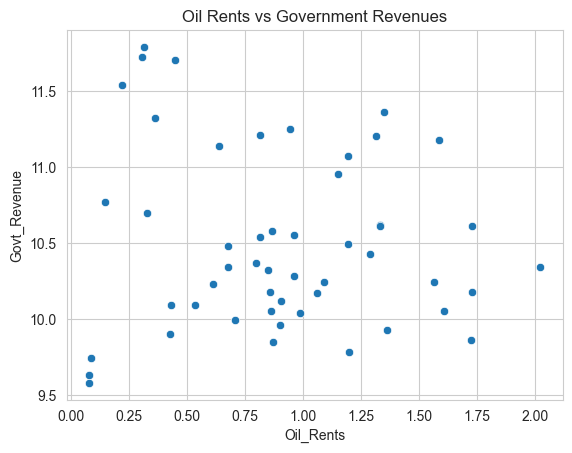

In [37]:
sns.scatterplot(data=df, x='Oil_Rents', y='Govt_Revenue')
plt.title("Oil Rents vs Government Revenues")
plt.show()


- No clear linear relationship between Oil Rents (% of GDP) and Government Revenues (% of GDP).
- Government revenues mostly stay within 9.5% to 11.5%, regardless of fluctuations in oil rents.
